In [1]:
from bunkatech.networks.network_class import SemanticNetwork
import pandas as pd
import networkx as nx

data = pd.read_csv(
    "/Users/charlesdedampierre/Desktop/ENS Projects/imaginary-world/db_film_iw (2).csv",
    index_col=[0],
)

data = data[['imdb', 'genre', 'country']].copy().dropna()
data['genre'] = data['genre'].apply(lambda x: x.split(', '))
data['country'] = data['country'].apply(lambda x: x.split(', '))
data = data.explode('genre')
data = data.explode('country')


Computing transition probabilities:   0%|          | 0/98 [00:00<?, ?it/s]


Generating walks (CPU: 8): 100%|██████████| 1/1 [00:00<00:00, 30.42it/s]

Computing transition probabilities:   0%|          | 0/108 [00:00<?, ?it/s]


Generating walks (CPU: 8): 100%|██████████| 1/1 [00:00<00:00, 20.99it/s]

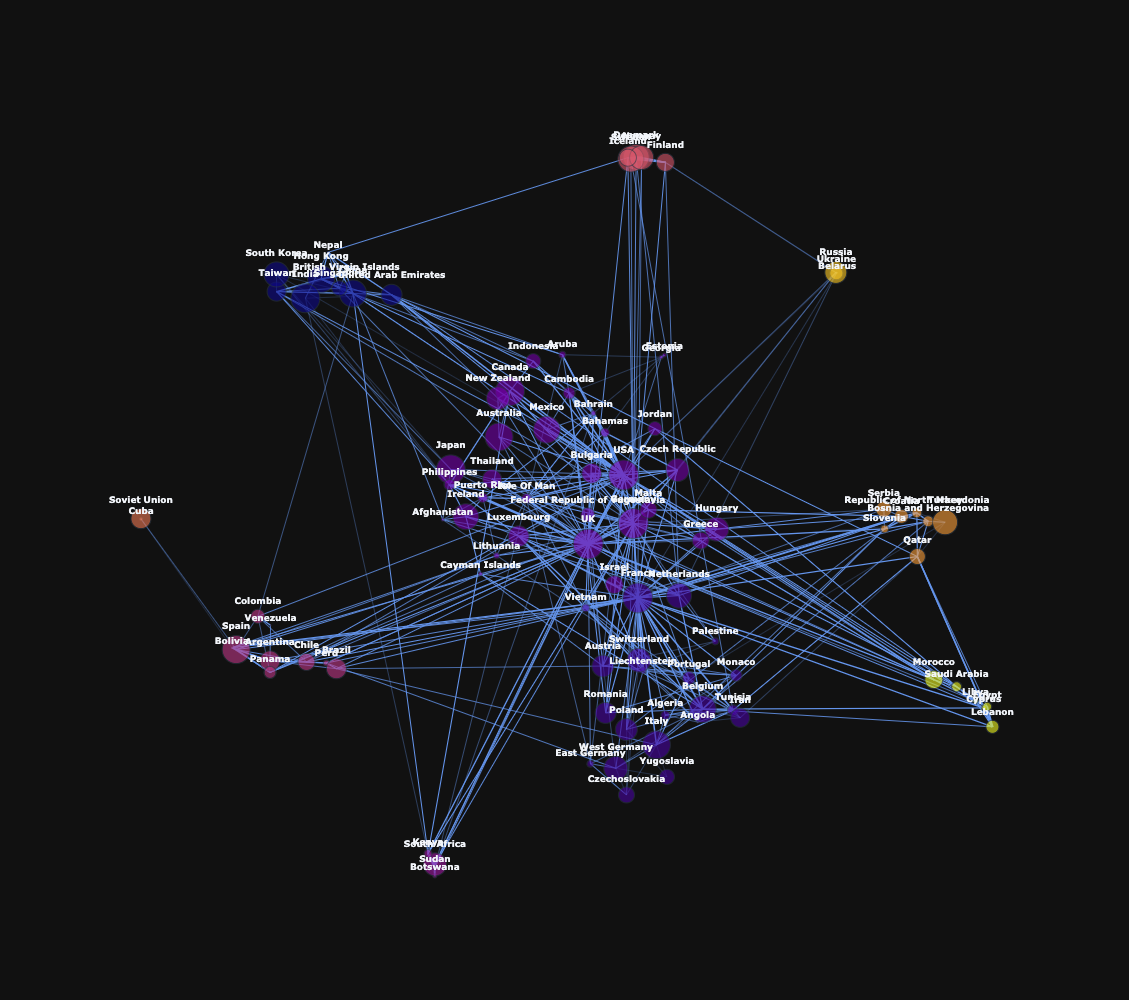

In [3]:
net = SemanticNetwork(data, variables = ['country'], key = 'imdb')

res = net.coocurrence_multiple()
res_top = net.get_top_nodes(top_n = 100)
res_filtered =  net.weight_to_similarity(global_filter= 0.2, n_neighbours = 6)

net.compute_network(
        density = 1.5,
        bin_number = 30,
        method = "node2vec",
        n_cluster = 10)

net.draw_network(color="community",
                size="size",
                symbol=None,
                textfont_size=9,
                edge_size=3,
                height_att=1000,
                width_att=1000,
                template="plotly_dark")

In [4]:
net.df_node

,centrality,community,entity,size
Afghanistan,13.0,0,0.0,3.0
UK,30.0,0,0.0,30.0
Netherlands,28.0,1,0.0,25.0
Puerto Rico,18.0,0,0.0,10.0
China,28.0,7,0.0,27.0
...,...,...,...,...
network_center_3,NaN,3,NaN,NaN
network_center_4,NaN,4,NaN,NaN
network_center_5,NaN,5,NaN,NaN
network_center_6,NaN,6,NaN,NaN


In [8]:
# find the centroid of the community
# add a connection to all other + weight to increase the attraction
# visualize bubble

In [14]:
df_node = net.df_node
for community_number in set(df_node.community):
    net.G.add_node(f"network_center_{community_number}",
                    #centrality=len(com) * larger,
                    community=community_number,
                    size=len(com) * bin_number)
                

{0, 1, 2, 3, 4, 5, 6}

In [34]:
def add_black_holes(G, density = 2):
    
    # Add centroids in the middle of every 'community' and connects it to
    # all the nodes in the 'community'
    
    df_node = pd.DataFrame.from_dict(
            dict(G.nodes(data=True)), orient="index"
        )
    for community_number in set(df_node.community):
    
        G.add_node(f"network_center_{community_number}",
                        community=community_number)

        list_nodes = list(df_node[df_node['community'] == 1].index)

        for node in list_nodes:
                G.add_edge(f"network_center_{community_number}", node, weight=density)

    return G

In [35]:
G = add_black_holes(net.G, density = 2)